### <a class="anchor" id="Rank">Executive Summary</a>

The goal of this project is to build a Restaurant Recommender System, which offers restuarant recommendation to users in the city of London

The metrics of the Recommender System is the accuracy of the systems models built:
I. Rank-based Recommender System
II. Content-based Recommender System
III. Collaborative-Fitering Recommender System with Surpise - SVD

The limitations of this project are 
I. Its is computationally expensive
II. Extremely large data size
      
_

The four notebooks used in this project are

I. Web Scraping the Data

II. Merging the Dataframes

III. Exploratory Data Analysis

IV. Restaurant Recommender System & Models

### III. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import numpy as np
import re

food = pd.read_csv('restau_london_final.csv', index_col=1)
del food['Unnamed: 0']
del food['Url']
food.head()

,Review,Rating,Category 1,Category 2
Name,,,,
Amrutha Lounge,425 reviews,5 of 5 bubbles,Indian,££ - £££\nIndian\nAsian\nHealthy\nVegetarian F...
Barge East,184 reviews,5 of 5 bubbles,European,££ - £££\nEuropean\nBritish\nContemporary\nFus...
Latitude,78 reviews,5 of 5 bubbles,European,££ - £££\nEuropean\nInternational\nBritish\nVe...
Dobar,107 reviews,5 of 5 bubbles,Pizza,££ - £££\nPizza\nCafe\nBritish\nVegetarian Fri...
Chojo,199 reviews,5 of 5 bubbles,Chinese,££ - £££\nChinese\nTaiwanese\nStreet Food\nVeg...


In [3]:
food.dropna(inplace=True)

In [4]:
food.Review = [int(x.replace(',', '').replace('reviews','').replace('review','')) for x in food.Review]
food.Rating = [float(str(x).replace('of 5 bubbles', '')) for x in food.Rating]
food = food[food.Rating != -1]

In [5]:
food['Category 2'] = [str(x).replace('££ - £££\n','').replace('£\n', '').replace('£££', '').replace('\n', ',').replace(',', ' ') for x in food['Category 2']]
food['Category 2'].head()

Name
Amrutha Lounge    Indian Asian Healthy Vegetarian Friendly Vegan...
Barge East        European British Contemporary Fusion Vegetaria...
Latitude          European International British Vegetarian Frie...
Dobar             Pizza Cafe British Vegetarian Friendly Vegan O...
Chojo             Chinese Taiwanese Street Food Vegetarian Frien...
Name: Category 2, dtype: object

In [6]:
food.head()

,Review,Rating,Category 1,Category 2
Name,,,,
Amrutha Lounge,425,5.0,Indian,Indian Asian Healthy Vegetarian Friendly Vegan...
Barge East,184,5.0,European,European British Contemporary Fusion Vegetaria...
Latitude,78,5.0,European,European International British Vegetarian Frie...
Dobar,107,5.0,Pizza,Pizza Cafe British Vegetarian Friendly Vegan O...
Chojo,199,5.0,Chinese,Chinese Taiwanese Street Food Vegetarian Frien...


In [7]:
lst = [re.findall('V........n', x) for x in food['Category 2']]

In [8]:
new_list = []
for i in lst:
    try:
        if i[0] == 'Vegetarian':
            new_list.append('Vegetarian')
        else:
            new_list.append('Non-Vegetarian')
    except:
        new_list.append('Non-Vegetarian')

In [9]:
food['Category 2'] = new_list

In [10]:
food['Category 1'].value_counts().head()

British     1963
Italian     1648
Cafe        1295
Indian      1079
European     726
Name: Category 1, dtype: int64

In [11]:
food['Category 1'].unique()

array(['Indian', 'European', 'Pizza', 'Chinese', 'German', 'French',
       'Italian', 'Mediterranean', 'British', 'Seafood', 'International',
       'Fast food', 'Steakhouse', 'Japanese', 'Cafe',
       'Vegetarian Friendly', 'Moroccan', 'American', 'Mexican',
       'Taiwanese', 'African', 'Asian', 'South American', 'Irish',
       'Fusion', 'Middle Eastern', 'Latin', 'Vietnamese', 'Lebanese',
       'Thai', 'Greek', 'Spanish', 'Barbecue', 'Caribbean', 'Polish',
       'Peruvian', 'Argentinian', 'Turkish', 'Venezuelan',
       'Cajun & Creole', 'Healthy', 'Philippine', 'Deli', 'Portuguese',
       'Sushi', 'Street Food', 'Burmese', 'Vegan Options', 'Malaysian',
       'Soups', 'Russian', 'Persian', 'Eastern European', 'Korean',
       'Gluten Free Options', 'Cuban', 'Pakistani', 'Halal', 'Hawaiian',
       'Kosher', 'Arabic', 'Ethiopian', 'Jamaican'], dtype=object)

In [12]:
other = ['Fast food', 'Seafood', 'International', 'Steakhouse', 'Cafe',  'Vegetarian Friendly', 'Street Food',
        'Fusion', 'Barbecue', 'Healthy', 'Deli', 'Vegan Options', 'Pizza', 'Sushi', 'Soups', 'Gluten Free Options']
east_euro = ['Russian', 'Polish']
euro = ['Irish', 'German', 'French', 'Latin', 'Greek', 'Portuguese']
s_american = ['Peruvian', 'Argentinian', 'Venezuelan', 'Cuban']
african = ['Cajun & Creole', 'Moroccan', 'Ethiopian']
asian = ['Philippine', 'Taiwanese', 'Pakistani', 'Korean', 'Vietnamese']
med = ['Persian', 'Malaysian', 'Burmese']
mid_east = ['Arabic', 'Kosher', 'Halal']

In [13]:
def classifier_other(x):

    if x in other:
        return 'General'
    elif x in east_euro:
        return 'Eastern European'
    elif x in euro:
        return 'European'
    elif x in s_american:
        return 'South American'
    elif x in african:
        return 'African'
    elif x in med:
        return 'Mediterranean'
    elif x in asian:
        return 'Asian'
    elif x in mid_east:
        return 'Middle Eastern'
    elif x == 'Jamaican':
        return 'Caribbean'
    elif x == 'Hawaiian':
        return 'American'
    else:
        return x

In [14]:
food['Category 1'] = food['Category 1'].apply(classifier_other)

In [15]:
food.head(20)

,Review,Rating,Category 1,Category 2
Name,,,,
Amrutha Lounge,425,5.0,Indian,Vegetarian
Barge East,184,5.0,European,Vegetarian
Latitude,78,5.0,European,Vegetarian
Dobar,107,5.0,General,Vegetarian
Chojo,199,5.0,Chinese,Vegetarian
German Doner Kebab,146,5.0,European,Non-Vegetarian
Bistro Mirey,81,5.0,European,Vegetarian
Core by Clare Smyth,546,5.0,European,Vegetarian
Buongiorno e Buonasera,234,5.0,Italian,Vegetarian


In [16]:
data_dic = {
            'Data Columns': list(food.columns),
            'Data Types': ['Object','Integer','Float','Object', 'Object'],
            'Data Description': ['Restaurant Name','Review','Rating','Category 1', 'Category 2'],
            'Data Shape': list(food.shape)
}

data_dic

{'Data Columns': ['Review', 'Rating', 'Category 1', 'Category 2'],
 'Data Types': ['Object', 'Integer', 'Float', 'Object', 'Object'],
 'Data Description': ['Restaurant Name',
  'Review',
  'Rating',
  'Category 1',
  'Category 2'],
 'Data Shape': [13291, 4]}

In [17]:
food.describe(include=['object','float','int'])

,Review,Rating,Category 1,Category 2
count,13291.000000,13291.000000,13291,13291
unique,NaN,NaN,20,2
top,NaN,NaN,General,Vegetarian
freq,NaN,NaN,3113,6804
mean,179.237755,3.994583,NaN,NaN
std,433.701678,0.660227,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,13.000000,3.500000,NaN,NaN
50%,51.000000,4.000000,NaN,NaN
75%,175.000000,4.500000,NaN,NaN


In [18]:
print(food['Rating'].value_counts())
print(food['Category 1'].value_counts())
print(food['Category 2'].value_counts())

4.0    4734
4.5    3557
3.5    2407
5.0    1238
3.0     782
2.5     292
2.0     151
1.0      76
1.5      54
Name: Rating, dtype: int64
General             3113
British             1963
Italian             1648
European            1223
Indian              1079
Asian                653
Chinese              642
Mediterranean        593
Japanese             546
American             512
Lebanese             246
Turkish              187
Middle Eastern       180
Mexican              175
Caribbean            129
Thai                 113
African              111
Spanish               79
South American        58
Eastern European      41
Name: Category 1, dtype: int64
Vegetarian        6804
Non-Vegetarian    6487
Name: Category 2, dtype: int64


Text(0.5, 1.0, 'Restaurant Rating Frequency')

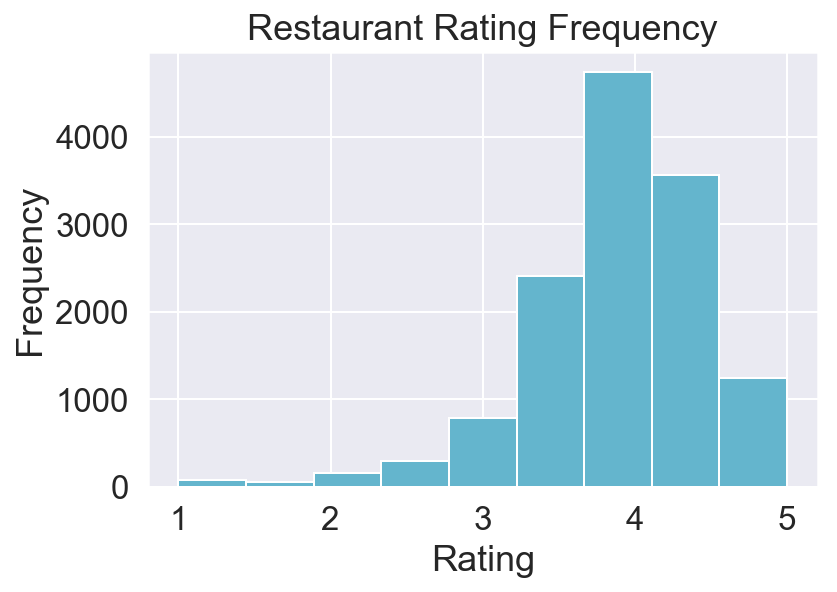

In [19]:
axe = food.Rating.plot(kind = 'hist', bins= 9, color= 'c')

axe.set_ylabel('Frequency')

axe.set_xlabel('Rating')
 
axe.set_title('Restaurant Rating Frequency')

In [20]:
grouped_by_cat1 = food.groupby('Category 1')
grouped_by_cat1.nunique()

,Review,Rating,Category 1,Category 2
Category 1,,,,
African,74,8,1,2
American,254,9,1,2
Asian,278,8,1,2
British,500,9,1,2
Caribbean,68,9,1,2
Chinese,238,9,1,2
Eastern European,35,7,1,2
European,580,9,1,2
General,479,9,1,2


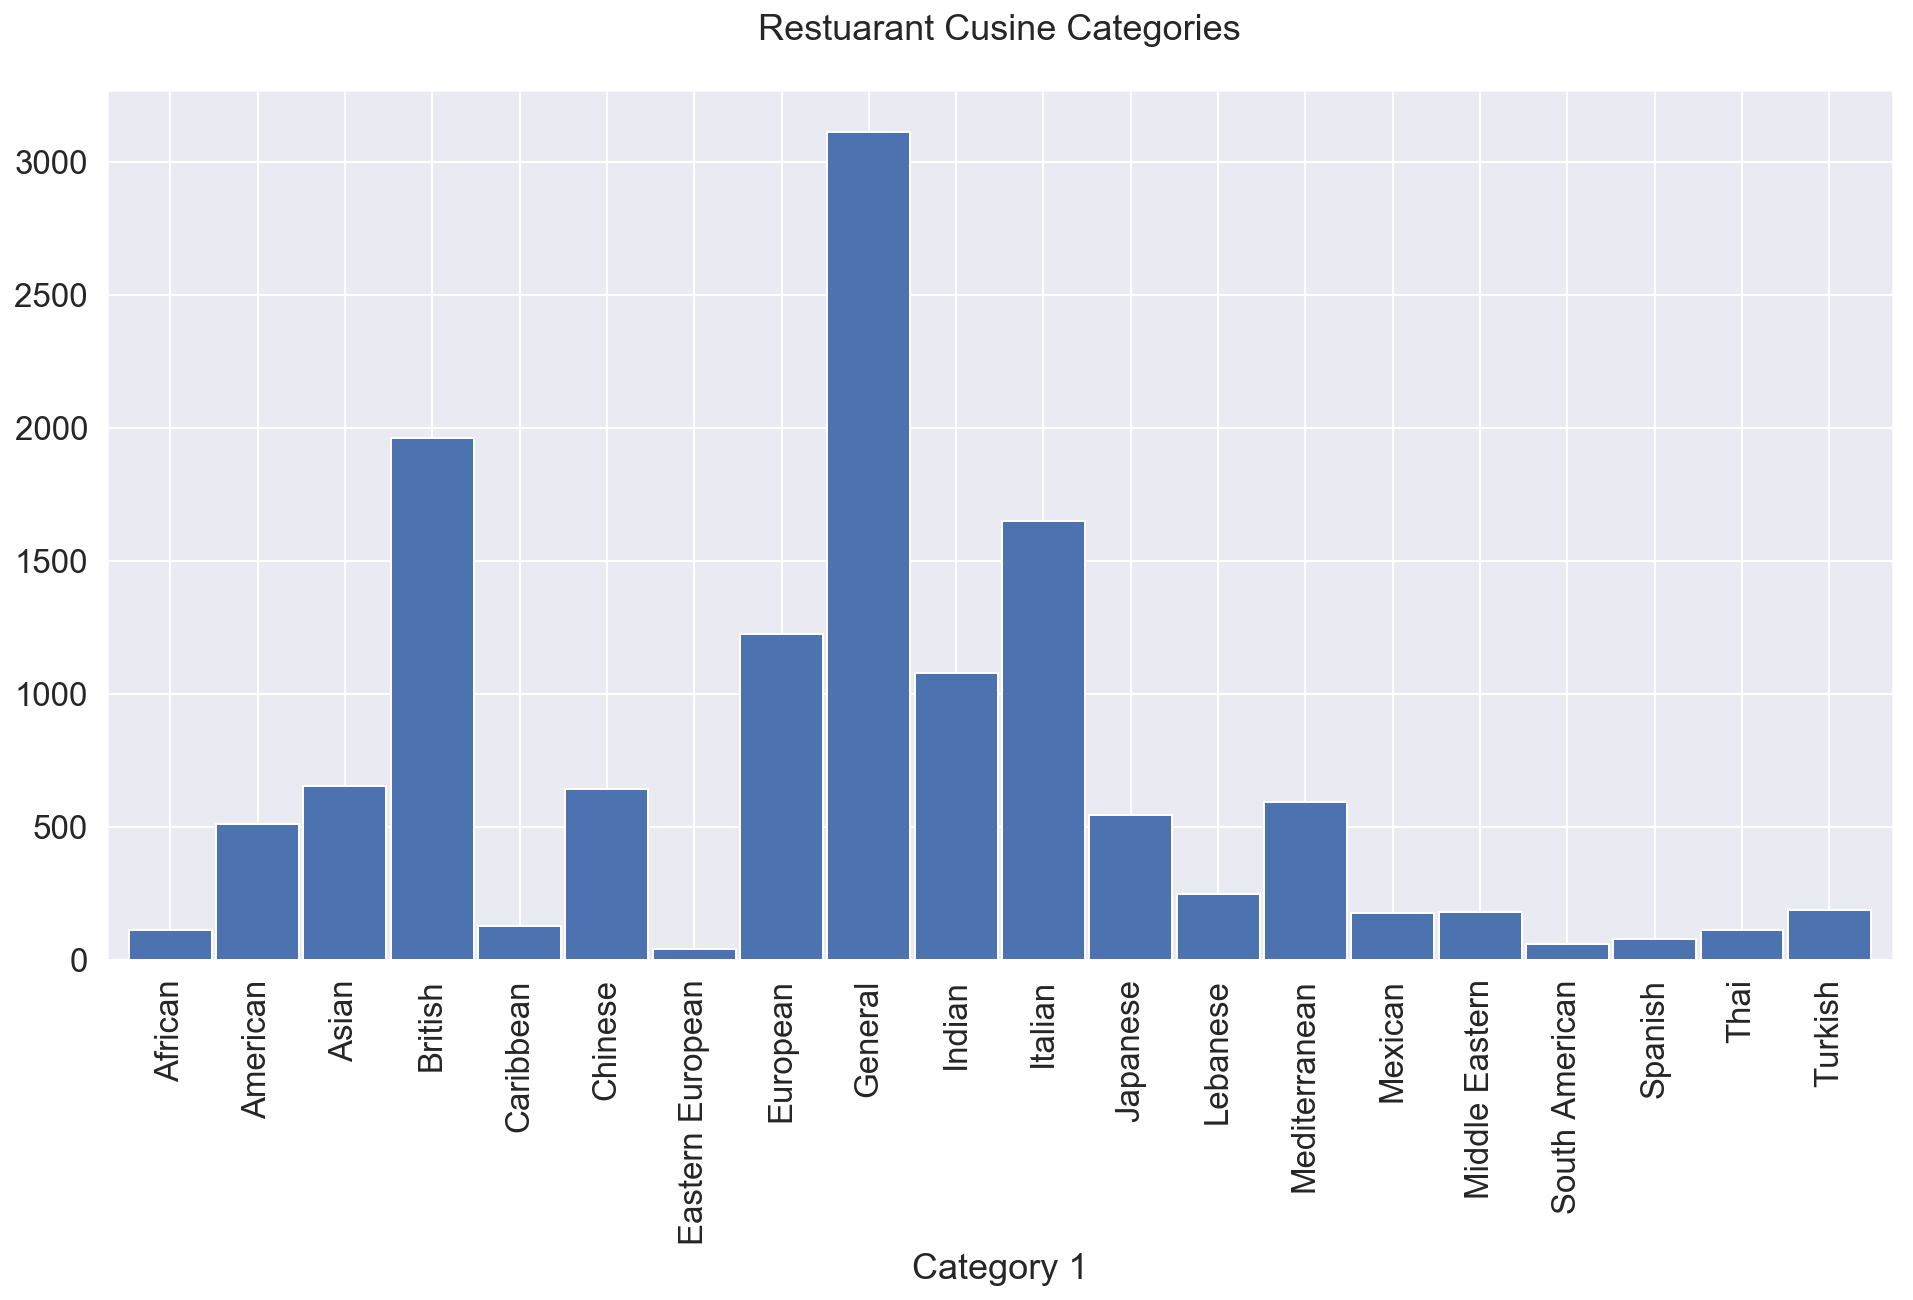

In [23]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()

food.groupby('Category 1').size().plot(kind='bar', color='b', width=0.95, figsize=(16,8))
plt.xticks(rotation=90)
ax.set_title('Restuarant Cusine Categories\n')
plt.show()

In [27]:
grouped_by_cat2 = food.groupby('Category 2')
grouped_by_cat2.nunique()

,Review,Rating,Category 1,Category 2
Category 2,,,,
Non-Vegetarian,434,9,20,1
Vegetarian,1153,7,20,1


In [28]:
cat2_review_mean = food.groupby(['Category 2', 'Rating'])[['Review']].mean()
cat2_review_mean.unstack()

Review                                                 \
Rating               1.0        1.5         2.0         2.5         3.0   
Category 2                                                                
Non-Vegetarian  2.144737  23.592593   22.194631   33.749104   38.522023   
Vegetarian           NaN        NaN  211.000000  122.923077  210.520710   

                                                                
Rating                 3.5         4.0         4.5         5.0  
Category 2                                                      
Non-Vegetarian   59.911909   71.313087   75.878470   10.209302  
Vegetarian      286.792549  335.036606  289.133993  111.044521

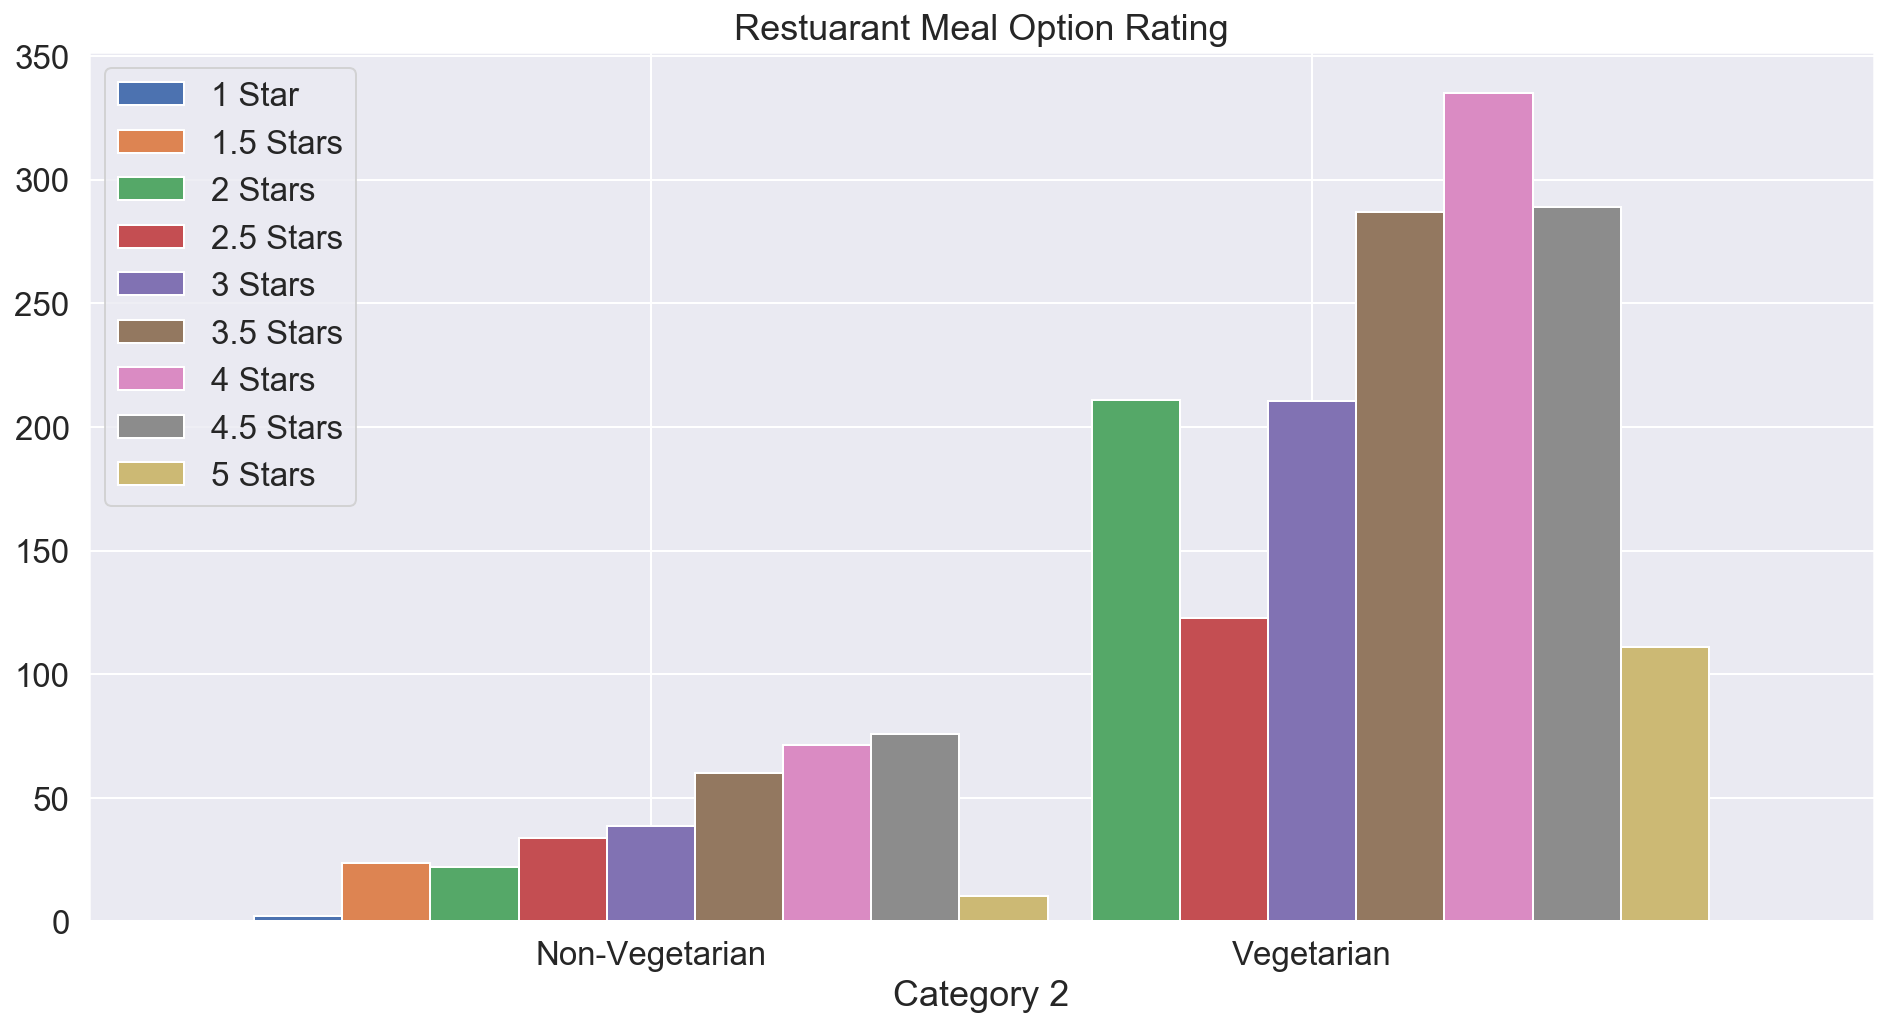

In [31]:


cat2_review_mean.unstack().plot(kind='bar', width=1.2, figsize=(16,8), title='Restuarant Meal Option Rating')
plt.legend(['1 Star', '1.5 Stars', '2 Stars', '2.5 Stars', '3 Stars', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars'])
plt.xticks(rotation=0)
plt.show()

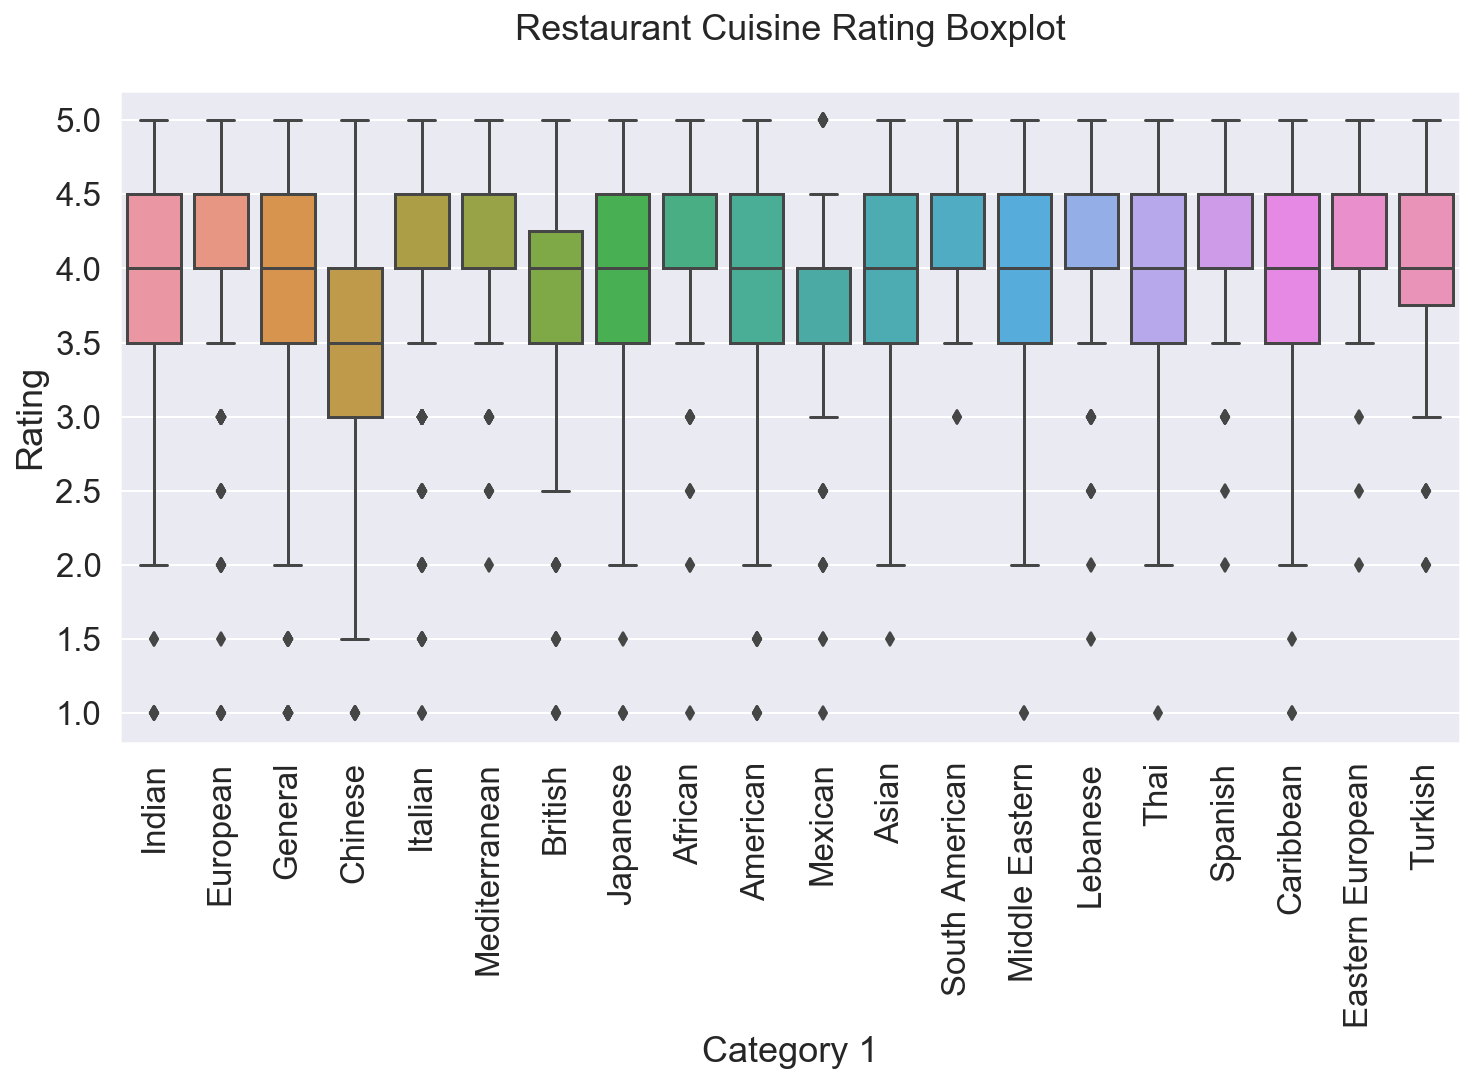

In [32]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()

sns.boxplot(y='Rating',x='Category 1',data=food,
            )

plt.xticks(rotation=90)
ax.set_title('Restaurant Cuisine Rating Boxplot\n')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


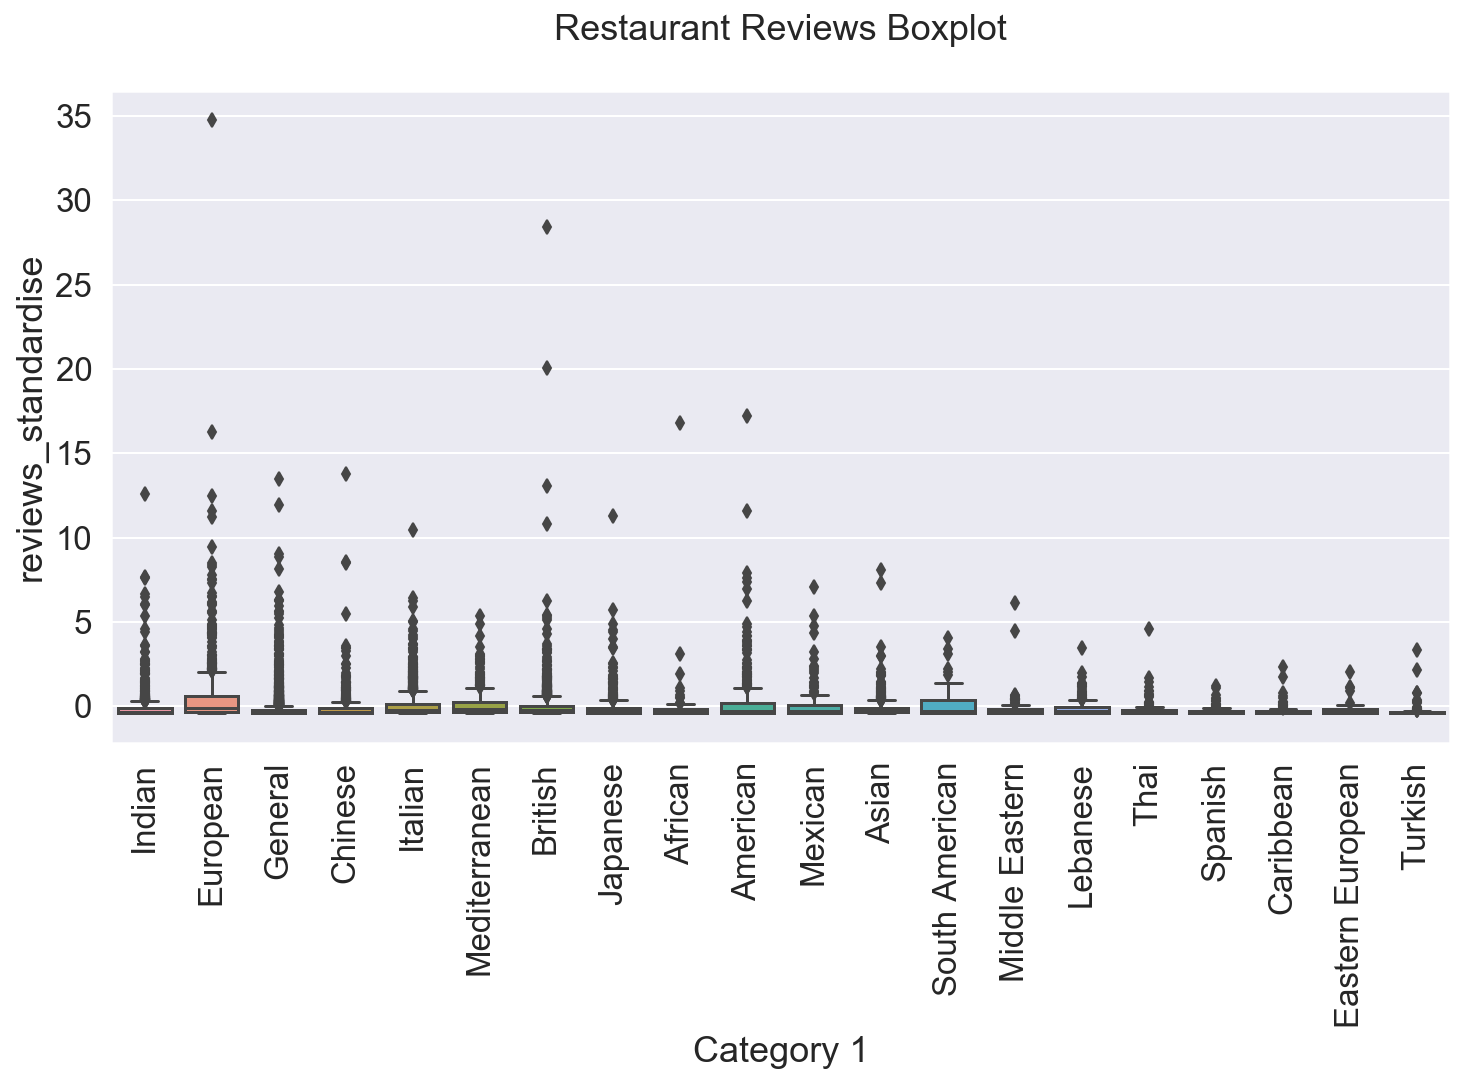

In [113]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
food['reviews_standardise']=scaler.fit_transform(food[['Review']])
sns.boxplot(y='reviews_standardise',x='Category 1',data=food,
            )

plt.xticks(rotation=90)
ax.set_title('Restaurant Reviews Boxplot\n')
plt.show()

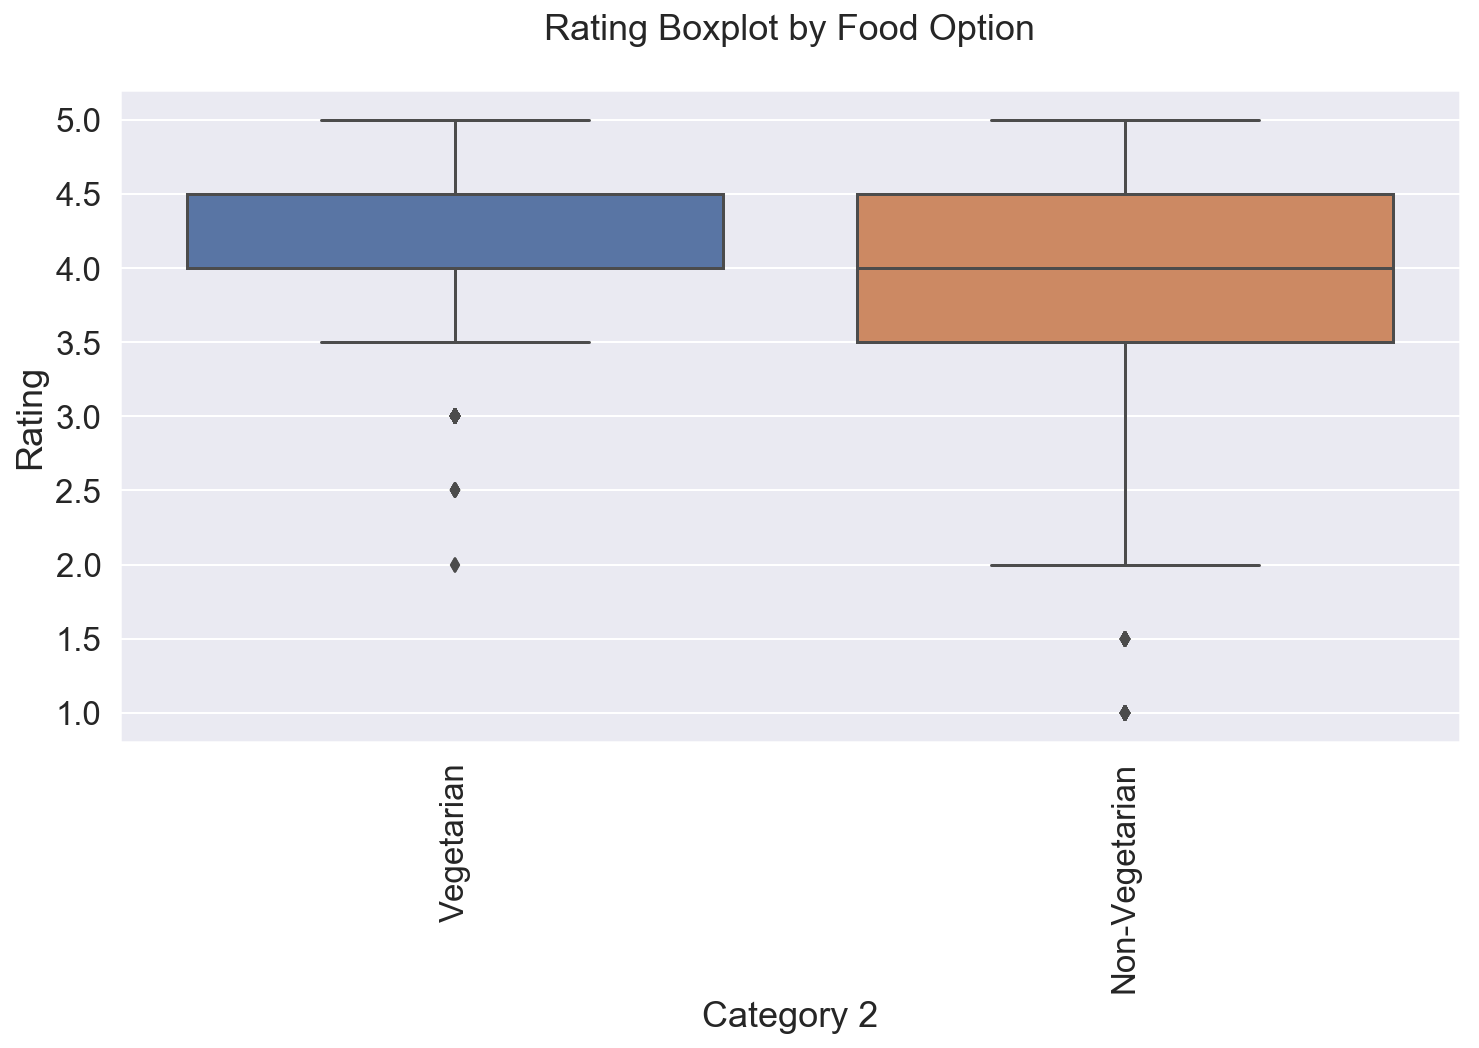

In [35]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()

sns.boxplot(y='Rating',x='Category 2',data=food,
            )

plt.xticks(rotation=90)
ax.set_title('Rating Boxplot by Food Option\n')
plt.show()

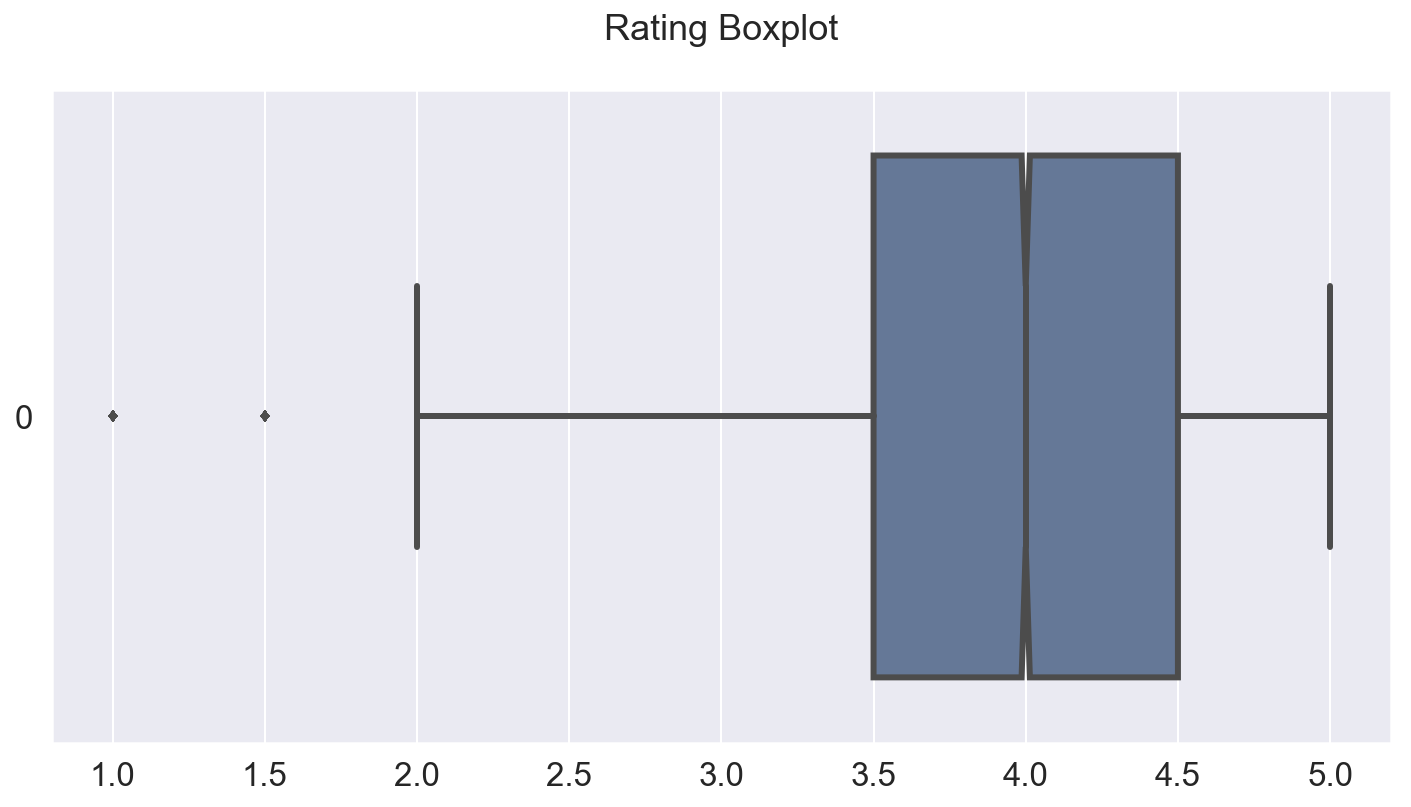

In [122]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()

sns.boxplot(data=food['Rating'], orient='h', fliersize=3, linewidth=3, notch=True,
            saturation=0.5, ax=ax)

ax.set_title('Rating Boxplot\n')
plt.show()